This notebook adds (.) annotations to the variants in the library and cleans the annotation file. 

In [1]:
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd
import json
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
from tqdm import tqdm
tqdm.pandas()

from RiboGraphViz import RGV
from RiboGraphViz import LoopExtruder, StackExtruder
from ipynb.draw import draw_struct
from nupack import *

from nnn.util import *
from nnn.fileio import *
from nnn.make_lib2b_annotations import *

import warnings
warnings.filterwarnings("ignore")

palette = cc.glasbey_dark

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
annotation = read_annotation('./data/annotation/NNNlib2b_annotation_nupack.txt',
                             './data/annotation/NNN_mastertable.tsv')
annotation.drop_duplicates(inplace=True)
annotation['TargetStruct'] = annotation.apply(get_target_struct, axis=1)

In [103]:
scaffolds = ['GCGC','CGCGCGCG', 'GATCGATC']
bulges_lib, bulges_names = make_bulges([scaffolds[1], scaffolds[2]])
bulgesNNN_lib, bulgesNNN_names = make_bulges_NNN([scaffolds[0]])

get_bulges_target_struct = lambda bulges_names, scaffold_ind: np.array([[row.replace('\n','').split('\t')[-2], row.replace('\n','').split('\t')[-1]] for row in bulges_names[scaffolds[scaffold_ind]]])

bulges = np.concatenate((get_bulges_target_struct(bulges_names, 1),
                         get_bulges_target_struct(bulges_names, 2),
                         get_bulges_target_struct(bulgesNNN_names, 0)), axis=0)

bulges 1280
bulgesNNN 10240


In [104]:
for i in tqdm(range(bulges.shape[0])):
    annotation.loc[annotation.eval('RefSeq == "%s"' % bulges[i,0]), 'TargetStruct'] = bulges[i,1]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 12800/12800 [00:20<00:00, 619.09it/s]


In [65]:
annotation['mfe_struct_Na_50mM_0C'] = annotation.RefSeq.progress_apply(lambda x: get_mfe_struct(x, celsius=0, sodium=0.05))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 34200/34200 [09:50<00:00, 57.93it/s]


In [69]:
annotation['mfe_struct_Na_1M_0C'] = annotation.RefSeq.progress_apply(lambda x: get_mfe_struct(x, celsius=0, sodium=1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 34200/34200 [09:59<00:00, 57.01it/s]


In [86]:
annotation['mfe_struct_Na_1M_20C'] = annotation.RefSeq.progress_apply(lambda x: get_mfe_struct(x, celsius=20, sodium=1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 34200/34200 [09:58<00:00, 57.16it/s]


In [87]:
annotation.rename(columns={'mfe_struct_Na_50mM':'mfe_struct_Na_50mM_0C',
                           'mfe_struct_Na_1M':'mfe_struct_Na_1M_0C'}, inplace=True)

In [88]:
annotation

,Series,ConstructType,Scaffold,Scaffoldposition,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK,ConstructClass,TargetStruct,mfe_struct_Na_50mM_0C,mfe_struct_Na_1M_0C,mfe_struct_Na_1M_20C
SEQID,,,,,,,,,,,,,,
TRINN0,TRIloop,NN,GCGC,Bottom,GCGAAAATCGC,-25.729372,-0.074312,73.083963,-2.645853,Triloops,((((...)))),(((.....))),((((...)))),((((...))))
TRINN1,TRIloop,NN,GCGC,Bottom,GCGAAATTCGC,-25.729005,-0.074311,73.085315,-2.645879,Triloops,((((...)))),(((.....))),((((...)))),((((...))))
TRINN2,TRIloop,NN,GCGC,Bottom,GCGAAACTCGC,-25.719284,-0.074275,73.120490,-2.646456,Triloops,((((...)))),(((.....))),((((...)))),((((...))))
TRINN3,TRIloop,NN,GCGC,Bottom,GCGAAAGTCGC,-25.679438,-0.074128,73.272118,-2.650905,Triloops,((((...)))),(((.....))),((((...)))),((((...))))
TRINN4,TRIloop,NN,GCGC,Bottom,GCGAATATCGC,-25.729198,-0.074311,73.084602,-2.645866,Triloops,((((...)))),(((.....))),((((...)))),((((...))))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC1,BaeControls,mismatch_controls,CG,Bottom,CAACCAGAAATGGTTG,-42.623607,-0.118901,85.328451,-5.630936,Controls,((((((....)))))),((((((....)))))),((((((....)))))),((((((....))))))
BC2,BaeControls,mismatch_controls,CG,Bottom,CTAACTGAAAAGTTAG,-39.804591,-0.114910,73.246978,-4.047113,Controls,((((((....)))))),((((((....)))))),((((((....)))))),((((((....))))))
BC3,BaeControls,mismatch_controls,AGCT,Bottom,AGAAGCCGAAAGGCTTCT,-54.517660,-0.150117,90.018171,-7.888848,Controls,(((((((....))))))),.((((((....)))))).,.((((((....)))))).,.((((((....)))))).


In [90]:
annotation.to_csv('./data/annotation/NNNlib2b_annotation_struct.tsv', sep='\t')

In [105]:
"""
Plot some example structures from a given series.
"""
from nnn import plotting

series = 'MismatchesCentered'

for i,row in annotation.query('Series=="%s"'%series).iloc[:10,:].iterrows():
    plotting.draw_target_mfe_struct(row)

save_multi_image('./fig/folding/%s_examples.pdf'%series)

In [99]:
get_part = lambda x: x[1:-1]
(annotation.TargetStruct.apply(get_part) == annotation.mfe_struct_Na_1M_0C.apply(get_part)).sum() / len(annotation)

0.669093567251462

# Updated version

03/15/2022

In [4]:
annotation_updated = pd.read_table('./data/annotation/NNNlib2b_annotation_20220314.tsv')
annotation_updated.drop_duplicates(inplace=True)
mastertable_updated = pd.read_table('./data/annotation/NNN_mastertable_updated.tsv')
set(annotation_updated.Series) - set(mastertable_updated.Series)

{'BaeControls', 'PseudoKnots', 'StemDangle', 'SuperStem', 'WBcontrols'}

In [5]:
annotation_updated.loc[annotation_updated.ConstructType == 'VariableLoops', 'Series'] = 'VARloop'
annotation_updated.loc[annotation_updated.Series == 'VARloop', 'SEQID'] = \
    annotation_updated.loc[annotation_updated.Series == 'VARloop', 'SEQID'].apply(lambda x: x.replace('PNTC', 'VAR'))

annotation_updated.loc[annotation_updated.ConstructType == 'pseudoknots', 'Series'] = 'External'
annotation_updated.loc[annotation_updated.Series == 'WBcontrols', 'Series'] = 'External'
annotation_updated.loc[annotation_updated.ConstructType == 'winstons_original_constructs', 'ConstructType'] = 'WBcontrols'
annotation_updated.loc[annotation_updated.ConstructType == 'PUMcontrols', 'Series'] = 'External'

annotation_updated.loc[annotation_updated.Series == 'BaeControls', 'ConstructType'] = 'BaeControls'
annotation_updated.loc[annotation_updated.Series == 'BaeControls', 'Series'] = 'External'

annotation_updated.loc[annotation_updated.Series == 'StemDangle', 'ConstructType'] = \
    annotation_updated.loc[annotation_updated.Series == 'StemDangle', 'ConstructType'].apply(lambda x: x.replace('rime_dangleAlen', '').replace('strong_stem_var', 'StemDangle'))
annotation_updated.loc[annotation_updated.Series == 'StemDangle', 'Series'] = 'Control'

annotation_updated.loc[annotation_updated.Series == 'SuperStem', 'ConstructType'] = 'SuperStem'
annotation_updated.loc[annotation_updated.Series == 'SuperStem', 'Series'] = 'Control'

In [6]:
annotation_updated['TargetStruct'] = annotation_updated.apply(get_target_struct, axis=1)

In [7]:
scaffolds = ['GCGC','CGCGCGCG', 'GATCGATC']
bulges_lib, bulges_names = make_bulges([scaffolds[1], scaffolds[2]])
bulgesNNN_lib, bulgesNNN_names = make_bulges_NNN([scaffolds[0]])

get_bulges_target_struct = lambda bulges_names, scaffold_ind: np.array([[row.replace('\n','').split('\t')[-2], row.replace('\n','').split('\t')[-1]] for row in bulges_names[scaffolds[scaffold_ind]]])

bulges = np.concatenate((get_bulges_target_struct(bulges_names, 1),
                         get_bulges_target_struct(bulges_names, 2),
                         get_bulges_target_struct(bulgesNNN_names, 0)), axis=0)

for i in tqdm(range(bulges.shape[0])):
    annotation_updated.loc[annotation_updated.eval('RefSeq == "%s"' % bulges[i,0]), 'TargetStruct'] = bulges[i,1]

bulges 1280
bulgesNNN 10240


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 12800/12800 [00:17<00:00, 743.16it/s]


In [329]:
annotation_updated.query('Series == "Bulges"')

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK,TargetStruct
5120,BNN0,Bulges,NN_5primebulge,CGCG,CGCG,CGAAACGGAAACGTTCG,-41.111930,-0.117135,77.829871,-4.258413,(((.(((....))))))
5121,BNN1,Bulges,NN_3primebulge,CGCG,CGCG,CGAACGGAAACGTATCG,-41.417938,-0.120220,71.366629,-3.651625,((((((....))).)))
5122,BNN2,Bulges,NN_5primebulge,CGCG,CGCG,CGAAAACGGAAACGTTCG,-32.241636,-0.089632,86.559915,-4.195073,(((..(((....))))))
5123,BNN3,Bulges,NN_3primebulge,CGCG,CGCG,CGAACGGAAACGTAATCG,-33.507018,-0.095713,76.926695,-3.539172,((((((....)))..)))
5124,BNN4,Bulges,NN_5primebulge,CGCG,CGCG,CGAACACGGAAACGTTCG,-35.155895,-0.100651,76.134702,-3.654054,(((..(((....))))))
...,...,...,...,...,...,...,...,...,...,...,...
23035,BNNN10235,Bulges,NNN_3primebulge,GC,CG,GCCCCCGAAAGGGGCGGC,-38.492230,-0.105575,91.446476,-5.694076,((((((....)))..)))
23036,BNNN10236,Bulges,NNN_5prime_bulge,GC,CG,GCCGTCCCGAAAGGGGGC,-35.843749,-0.101864,78.727626,-4.093347,(((..(((....))))))
23037,BNNN10237,Bulges,NNN_3primebulge,GC,CG,GCCCCCGAAAGGGGTGGC,-39.239134,-0.109219,86.121125,-5.315185,((((((....)))..)))
23038,BNNN10238,Bulges,NNN_5prime_bulge,GC,CG,GCCGGCCCGAAAGGGGGC,-35.646647,-0.100054,83.122706,-4.549083,(((..(((....))))))


In [338]:
annotation_updated.rename(columns={'dG_37_NUPACK': 'dG_37_ensemble_NUPACK'}, inplace=True)

In [339]:
nupack_param = annotation_updated.progress_apply(lambda row: get_nupack_dH_dS_Tm_dG_37(row.RefSeq, row.TargetStruct), axis=1)
annotation_updated[['dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK', 'dG_37_NUPACK']] = np.array(nupack_param.values.tolist())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 34232/34232 [28:42<00:00, 19.87it/s]


In [328]:
assert(len(set(annotation_updated.Series) - set(mastertable_updated.Series)) == 0)

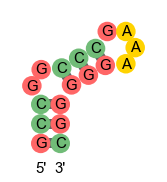

In [331]:
# test get_target_struct
row = annotation_updated.query('Series == "Bulges"').iloc[-2,:]
try:
    draw_struct(row.RefSeq, row.TargetStruct)
except:
    print(row.RefSeq, row.TargetStruct)
    print(len(row.RefSeq), len(row.TargetStruct))

In [174]:
from scripts.make_lib3 import *

In [187]:
scaffolds = ['GC','CGCG','GATC']
scaffolds = get_rc(scaffolds)
mismatches_3mer = make_3mer_mismatches(scaffolds, add_loop=True, filter_3_mismatches=True)

In [243]:
df_3mer = pd.DataFrame(mismatches_3mer).melt()
df_3mer.columns = ['scaffold', 'RefSeq']

In [269]:
df_3mer['SEQID'] = ['MMTM%d'%i for i in range(len(df_3mer))]
df_3mer['Series'] = 'MisMatches'
df_3mer['ConstructType'] = '3mer'
df_3mer['topScaffold'] = df_3mer.scaffold.apply(lambda x: get_top_bottom_scaffold(x, 'top'))
df_3mer['bottomScaffold'] = df_3mer.scaffold.apply(lambda x: get_top_bottom_scaffold(x, 'bottom'))
df_3mer['TargetStruct'] = df_3mer.apply(get_target_struct, axis=1)
nupack_param = df_3mer.progress_apply(lambda row: get_nupack_dH_dS_Tm_dG_37(row.RefSeq, get_target_struct(row)), axis=1)
df_3mer[['dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK', 'dG_37_NUPACK']] = np.array(nupack_param.values.tolist())
df_3mer['dG_37_ensemble_NUPACK'] = df_3mer.RefSeq.progress_apply(lambda seq: get_seq_ensemble_dG(seq, 37))
df_3mer

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 7104/7104 [05:57<00:00, 19.86it/s]


,scaffold,RefSeq,SEQID,Series,ConstructType,topScaffold,bottomScaffold,TargetStruct,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK
0,GCGC,GCAAAGCGAAAGCTAAGC,MMTM0,MisMatches,3mer,GCGC,GCGC,((..(((....)))..)),-39.6,-0.118459,61.143413,-2.86
1,GCGC,GCAATGCGAAAGCAAAGC,MMTM1,MisMatches,3mer,GCGC,GCGC,((..(((....)))..)),-40.3,-0.119845,63.117016,-3.13
2,GCGC,GCAACGCGAAAGCGAAGC,MMTM2,MisMatches,3mer,GCGC,GCGC,((..(((....)))..)),-44.4,-0.129453,69.830324,-4.25
3,GCGC,GCAAGGCGAAAGCCAAGC,MMTM3,MisMatches,3mer,GCGC,GCGC,((..(((....)))..)),-41.8,-0.122457,68.194655,-3.82
4,GCGC,GCAAAGCGAAAGCATAGC,MMTM4,MisMatches,3mer,GCGC,GCGC,((.(.((....)).).)),-21.7,-0.067000,50.731376,-0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
7099,GATCGATC,GATGGGCGATCGAAAGATCGGCGATC,MMTM7099,MisMatches,3mer,CGATCGATCG,GATATC,(((.(.(((((....))))).).))),-71.7,-0.204353,77.713916,-8.32
7100,GATCGATC,GATGGACGATCGAAAGATCGTGGATC,MMTM7100,MisMatches,3mer,CGATCGATCG,GATATC,(((..((((((....))))))..))),-68.2,-0.200645,66.754066,-5.97
7101,GATCGATC,GATGGTCGATCGAAAGATCGAGGATC,MMTM7101,MisMatches,3mer,CGATCGATCG,GATATC,(((..((((((....))))))..))),-68.0,-0.200451,66.084357,-5.83
7102,GATCGATC,GATGGCCGATCGAAAGATCGGGGATC,MMTM7102,MisMatches,3mer,CGATCGATCG,GATATC,(((..((((((....))))))..))),-69.8,-0.203224,70.312954,-6.77


In [341]:
annotation_all = pd.concat([annotation_updated, df_3mer.drop(columns='scaffold')])

In [350]:
annotation_all

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_ensemble_NUPACK,TargetStruct,dG_37_NUPACK
0,TRINN0,TRIloop,NN,GCGC,NaN,GCGAAAATCGC,-26.4,-0.078156,64.637129,-2.645853,((((...)))),-2.16
1,TRINN1,TRIloop,NN,GCGC,NaN,GCGAAATTCGC,-26.4,-0.078156,64.637129,-2.645879,((((...)))),-2.16
2,TRINN2,TRIloop,NN,GCGC,NaN,GCGAAACTCGC,-26.4,-0.078156,64.637129,-2.646456,((((...)))),-2.16
3,TRINN3,TRIloop,NN,GCGC,NaN,GCGAAAGTCGC,-26.4,-0.078156,64.637129,-2.650905,((((...)))),-2.16
4,TRINN4,TRIloop,NN,GCGC,NaN,GCGAATATCGC,-26.4,-0.078156,64.637129,-2.645866,((((...)))),-2.16
...,...,...,...,...,...,...,...,...,...,...,...,...
7099,MMTM7099,MisMatches,3mer,GATATC,CGATCGATCG,GATGGGCGATCGAAAGATCGGCGATC,-71.7,-0.204353,77.713916,-8.910037,(((.(.(((((....))))).).))),-8.32
7100,MMTM7100,MisMatches,3mer,GATATC,CGATCGATCG,GATGGACGATCGAAAGATCGTGGATC,-68.2,-0.200645,66.754066,-7.424770,(((..((((((....))))))..))),-5.97
7101,MMTM7101,MisMatches,3mer,GATATC,CGATCGATCG,GATGGTCGATCGAAAGATCGAGGATC,-68.0,-0.200451,66.084357,-6.907534,(((..((((((....))))))..))),-5.83
7102,MMTM7102,MisMatches,3mer,GATATC,CGATCGATCG,GATGGCCGATCGAAAGATCGGGGATC,-69.8,-0.203224,70.312954,-7.955172,(((..((((((....))))))..))),-6.77


In [351]:
annotation_all.to_csv('./data/annotation/NNNlib2b_annotation_20220316.tsv', sep='\t', index=False)

## Update NUPACK param calculation

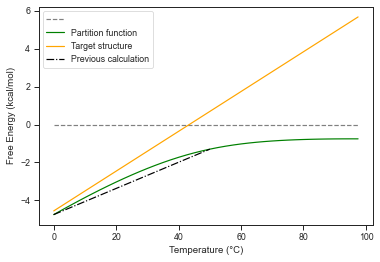

In [16]:
T = np.arange(0, 100, 2.5)
dG_ensemble = np.zeros_like(T)
dG_target_struct = np.zeros_like(T)

# row = df_3mer.iloc[1,:]
row = annotation_updated.query('Series == "WatsonCrick"').iloc[0,:]
for i,celsius in enumerate(T):
    dG_ensemble[i] = get_seq_ensemble_dG(row.RefSeq, celsius, sodium=0.075)
    dG_target_struct[i] = get_seq_structure_dG(row.RefSeq, get_target_struct(row), celsius, sodium=0.075)
    
plt.plot(T, np.zeros_like(T), '--', c='gray')
plt.plot(T, dG_ensemble, 'g')
plt.plot(T, dG_target_struct, 'orange')
plt.plot(T[[0,20]], dG_ensemble[[0,20]], 'k-.')
plt.xlabel('Temperature (°C)')
plt.ylabel('Free Energy (kcal/mol)')
plt.legend(['','Partition function', 'Target structure', 'Previous calculation'])
save_fig('./fig/NUPACK/NUPACK_different_ways_calc_dG.pdf')

In [302]:
get_seq_ensemble_dG(row.RefSeq, celsius=100, sodium=0.075)

-0.7562581175899865

In [300]:
get_mfe_struct(row.RefSeq, celsius=100, sodium=0.75, return_free_energy=True)

('..............', 0.0)

In [307]:
t_model = nupack.Model(material='DNA', celsius=100, sodium=1, magnesium=0.0)
nupack.mfe(row.RefSeq, model=t_model)

[StructureEnergy(Structure('..............'), energy=0.0, stack_energy=0.0)]

In [308]:
nupack.pfunc(row.RefSeq, t_model)

(Decimal('4.603604260'), -1.132170575873957)

In [271]:
sublib = annotation_updated.sample(n=100)
nupack_param = sublib.progress_apply(lambda row: get_nupack_dH_dS_Tm_dG_37(row.RefSeq, get_target_struct(row)), axis=1)
sublib[[x+'_new' for x in ['dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK', 'dG_37_NUPACK']]] = np.array(nupack_param.values.tolist())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.69it/s]


In [272]:
sublib

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK,dH_NUPACK_new,dS_NUPACK_new,Tm_NUPACK_new,dG_37_NUPACK_new
16747,BNNN3947,Bulges,NNN_3primebulge,GC,CG,GTGAGCGAAAGCTTTCAC,-31.715037,-0.090313,78.018012,-3.411813,0.00000,-0.000000,NaN,0.000000
9797,TETNNN1093,TETRAloop,NNN,GATCGATC,NaN,GATCTATATTTAGATC,-36.647973,-0.108814,63.643371,-2.670590,-41.00000,-0.124972,54.924045,-2.240000
12764,TETNNN4060,TETRAloop,NNN,GATCGATC,NaN,GATCCCGTGAGGGATC,-42.928337,-0.118533,89.014994,-6.022060,-45.80000,-0.129099,81.616983,-5.760000
13643,BNNN843,Bulges,NNN_3primebulge,GC,CG,GATTTCGAAAGAAAAATC,-30.063136,-0.087858,69.028912,-2.687298,0.00000,-0.000000,NaN,0.000000
20260,BNNN7460,Bulges,NNN_5prime_bulge,GC,CG,GGCTGGCGAAAGCCGCC,-49.223402,-0.141062,75.798972,-5.310471,0.00000,-0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30118,SD8,Control,StemDangle_3p,NaN,GCGCGCGC,GCGCGAAAGCGCAAA,-42.037937,-0.115846,89.727053,-6.094899,-41.39329,-0.113356,92.010894,-6.214564
9759,TETNNN1055,TETRAloop,NNN,GATCGATC,NaN,GATCTAATGGTAGATC,-36.679434,-0.108673,64.372482,-2.750052,-40.90000,-0.124327,55.821343,-2.340000
17538,BNNN4738,Bulges,NNN_5prime_bulge,GC,CG,GTCCGTGCGAAAGCAGAC,-34.001662,-0.099685,67.942324,-2.920629,0.00000,-0.000000,NaN,0.000000
12985,BNNN185,Bulges,NNN_3primebulge,GC,CG,GAATACGAAAGTATCTTC,-25.563608,-0.073776,73.353459,-2.470073,0.00000,-0.000000,NaN,0.000000


In [294]:
annotation_updated.query('Series == "WatsonCrick"')

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_NUPACK
26112,WC0,WatsonCrick,WC_5ntstem,NaN,NaN,AAAAAGAAATTTTT,-27.941107,-0.080679,73.176115,-2.681988
26113,WC3,WatsonCrick,WC_5ntstem,NaN,NaN,AAAATGAAAATTTT,-27.056942,-0.078517,71.447974,-2.482308
26114,WC6,WatsonCrick,WC_5ntstem,NaN,NaN,AAAAGGAAACTTTT,-30.196117,-0.086264,76.894068,-3.252249
26115,WC9,WatsonCrick,WC_5ntstem,NaN,NaN,AAAACGAAAGTTTT,-31.965176,-0.091484,76.256427,-3.406426
26116,WC12,WatsonCrick,WC_5ntstem,NaN,NaN,AAATAGAAATATTT,-26.724877,-0.078610,66.816949,-2.091868
...,...,...,...,...,...,...,...,...,...,...
29179,WC3059,WatsonCrick,WC_7ntstem,GC,GC,GCCCGCGGAAACGCGGGC,-61.456102,-0.162075,106.032559,-11.177591
29180,WC3062,WatsonCrick,WC_7ntstem,GC,GC,GCCCCAGGAAACTGGGGC,-54.688434,-0.146702,99.635576,-9.174301
29181,WC3065,WatsonCrick,WC_7ntstem,GC,GC,GCCCCTGGAAACAGGGGC,-54.693000,-0.146720,99.620698,-9.173155
29182,WC3068,WatsonCrick,WC_7ntstem,GC,GC,GCCCCGGGAAACCGGGGC,-57.046872,-0.150207,106.638235,-10.448961


<AxesSubplot:xlabel='dG_37_NUPACK_new', ylabel='dG_37_NUPACK'>

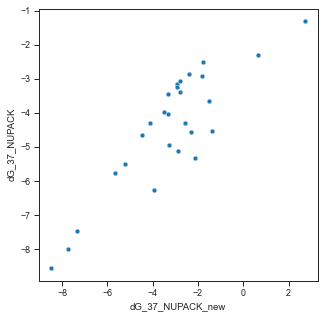

In [281]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=sublib.dropna(), x='dG_37_NUPACK_new', y='dG_37_NUPACK')
# plt.xlim([40,100])
# plt.ylim([40,100])

## Filter by misfolding

In [5]:
from nnn import fileio
import nupack
annotation = fileio.read_annotation('./data/annotation/nnnlib2b_annotation_20220316.tsv')

In [6]:
from nnn import util
from tqdm import tqdm
tqdm.pandas()

In [46]:
def get_seq_end_pair_prob(seq, celsius, sodium=1.0):
    my_model = nupack.Model(material='DNA', celsius=celsius, sodium=sodium, magnesium=0.0)
    pair_mat = nupack.pairs([seq], model=my_model).to_array()
    
    try:
        p1, p2 = pair_mat[0,-1], pair_mat[1,-2]
    except:
        p1, p2 = np.nan, np.nan
        
    return p1 + p2 - p1 * p2

get_seq_end_pair_prob(seq, celsius=20, sodium=0.150)

0.9989921925388888

In [28]:
annotation['pair_prob'] = annotation.RefSeq.progress_apply(lambda seq: get_seq_end_pair_prob(seq, celsius=0, sodium=0.075))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 41336/41336 [12:19<00:00, 55.92it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 41336/41336 [12:09<00:00, 56.69it/s]


<AxesSubplot:xlabel='RefSeq', ylabel='Density'>

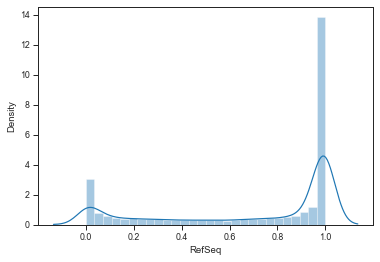

In [47]:
pair_prob = annotation.RefSeq.progress_apply(lambda seq: get_seq_end_pair_prob(seq, celsius=0, sodium=0.075))
sns.distplot(pair_prob)

In [49]:
annotation['pair_prob'] = pair_prob
annotation.to_csv('./data/annotation/nnnlib2b_annotation_20220324.tsv', sep='\t')

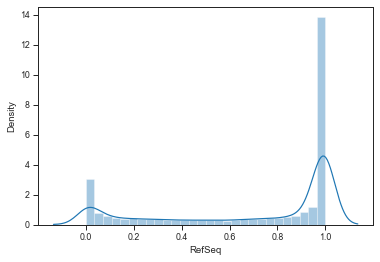

In [48]:
sns.distplot(pair_prob)
util.save_fig('./fig/folding/pairing_prob_0C_75mM.pdf')

In [56]:
(pair_prob > .75).sum() / len(pair_prob)

0.6312899167795626

# Simulate end closing from NUPACK

In [10]:
from nnn import simulation, plotting, util

In [48]:
r1 = fileio.read_fitted_variant('./data/fitted_variant/NNNlib2b_DNA_20220314_v1.CPvariant.gz')
annotation = fileio.read_annotation('./data/annotation/nnnlib2b_annotation_20220324.tsv')


38.54% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


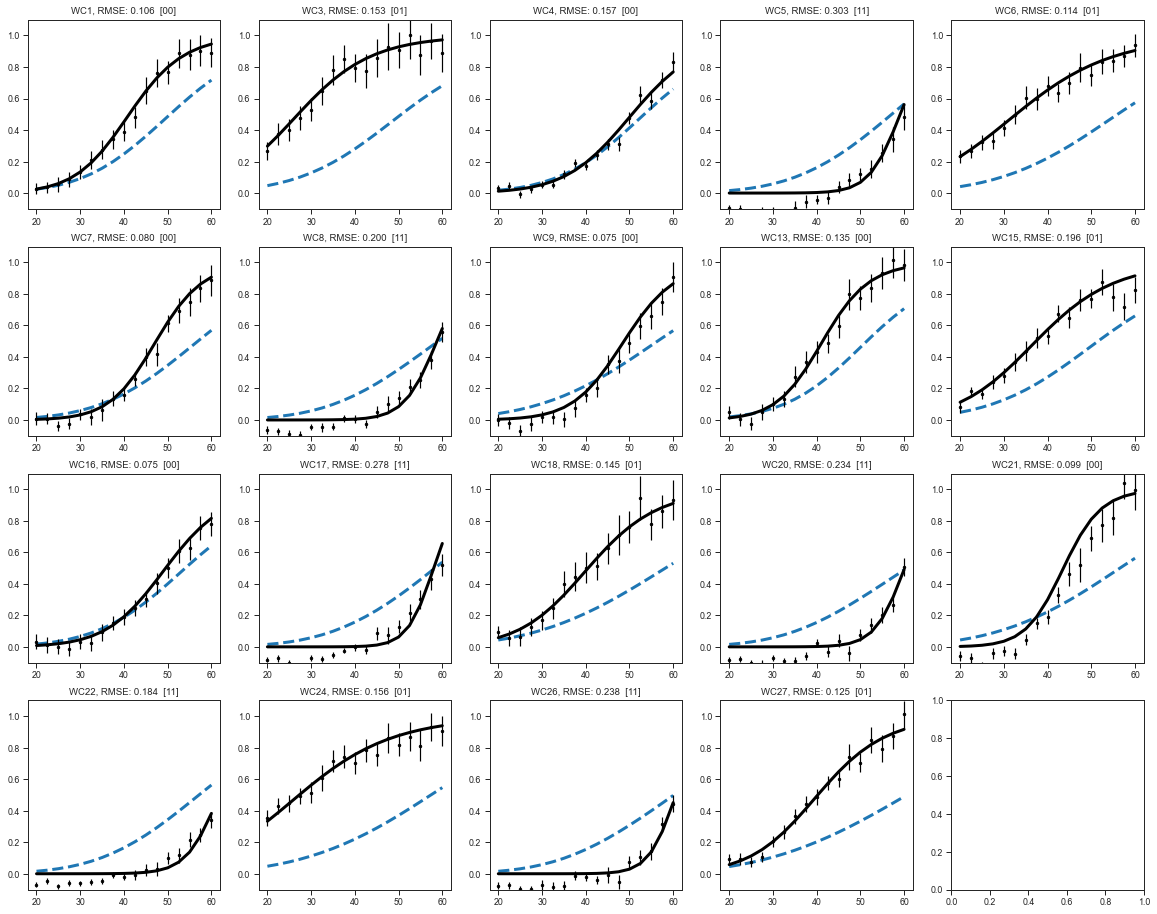

In [60]:
T = np.arange(20, 62.5, 2.5)
fig, ax = plt.subplots(4,5, figsize=(20,16))
ax = ax.flatten()
count = 0
for i in range(28):
    seqid = 'WC%d'%(i+1)
    if seqid in r1.index:
        
        sim_curve = simulation.simulate_nupack_curve(seq=annotation.loc[seqid,'RefSeq'], sodium=0.150)
        plotting.plot_renorm_actual_and_expected_fit(r1.loc[seqid,:], ax=ax[count])
        # plotting.plot_corrected_NUPACK_curve(annotation.loc[seqid,:], ax=ax[count], sodium=0.150, c='purple')
        ax[count].plot(T, sim_curve, '--', linewidth=3, zorder=0)
        plt.ylim([0,1])
        count += 1
util.save_fig('./fig/simulate_curve/WC_curves_last_2_pair_unpaired_prob.pdf')


In [53]:
annotation['dG_37_NUPACK_150mM'] = annotation.RefSeq.progress_apply(lambda seq: util.get_seq_ensemble_dG(seq, celsius=37, sodium=0.150))

100%|█████████████████████████████████████████████████████| 41336/41336 [12:11<00:00, 56.52it/s]


In [57]:
annotation['dG_37_NUPACK_75mM'] = annotation.RefSeq.progress_apply(lambda seq: util.get_seq_ensemble_dG(seq, celsius=37, sodium=0.075))

100%|█████████████████████████████████████████████████████| 41336/41336 [12:01<00:00, 57.28it/s]


In [61]:
annotation.to_csv('./data/annotation/nnnlib2b_annotation_20220328.tsv', sep='\t')

# Double check everything ordered is in the annotation file
03/28/2022 -> \*20220329.tsv

Updated on 04/18/2022 -> \*20220418.tsv

In [12]:
annotation = pd.read_table('./data/annotation/nnnlib2b_annotation_20220328.tsv')

In [10]:
from scripts.make_lib3 import rcompliment
from scripts.NNN_libraryfragment_designer import add_libfrag1, get_rc, extract_refseq

In [13]:
# Read order file
lib_order = pd.read_csv('./data/annotation/NNNlib2b_finalorder.csv', header=None)
lib_order.columns = ['index', 'sequence']
lib_order.set_index('index', inplace=True)
lib_order = lib_order.drop_duplicates()

# Extract RefSeq
lib_order['RefSeq'] = lib_order['sequence'].apply(extract_refseq)

# Check is in annotation
lib_order['annotated'] = np.isin(lib_order.RefSeq.tolist(), annotation.RefSeq.tolist())

In [14]:
# Show summary of what's missing
unannotated =pd.DataFrame(lib_order.query('not annotated').index)
unannotated['ConstructType'] = unannotated['index'].apply(lambda s: ''.join(c for c in s if not c.isdigit()))
unannotated.groupby('ConstructType').apply(len)


ConstructType
WB_controls             8
bae_controls           18
pseudoknot_pt_muts    744
pseudoknots            39
varloop                32
dtype: int64

In [15]:
unannotated.set_index('index', inplace=True)

In [16]:
missing_df = lib_order.loc[unannotated.index.tolist(), :].join(unannotated)



In [18]:
missing_df = missing_df.drop(columns=['sequence', 'annotated'])
# Rename ConstructType
missing_df.loc[missing_df.ConstructType == 'bae_controls', 'ConstructType'] = 'BaeControls'
missing_df.loc[missing_df.ConstructType == 'WB_controls', 'ConstructType'] = 'WBcontrols'
missing_df.loc[missing_df.ConstructType == 'varloop', 'ConstructType'] = 'VARloop'

# Add Series name
missing_df['Series'] = None
missing_df.loc[missing_df.ConstructType.isin( ['WBcontrols', 'BaeControls']), 'Series'] = 'External'
missing_df.loc[missing_df.ConstructType == 'VARloop', 'Series'] = 'VARloop'
missing_df.loc[missing_df.ConstructType.isin( ['pseudoknot_pt_muts', 'pseudoknots']), 'Series'] = 'External'

In [21]:
missing_df['dG_37_ensemble_NUPACK'] = missing_df.RefSeq.progress_apply(lambda seq: get_seq_ensemble_dG(seq, 37, sodium=1.0))
missing_df['dG_37_ensemble_150mM_NUPACK'] = missing_df.RefSeq.progress_apply(lambda seq: get_seq_ensemble_dG(seq, 37, sodium=0.15))
missing_df['dG_37_ensemble_75mM_NUPACK'] = missing_df.RefSeq.progress_apply(lambda seq: get_seq_ensemble_dG(seq, 37, sodium=0.075))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 841/841 [00:14<00:00, 57.76it/s]


In [23]:
# Add SEQID
missing_df = missing_df.reset_index()
missing_df.loc[missing_df.ConstructType == 'BaeControls', 'index'] = ['BC%d'%(i+6) for i in range(18)]
missing_df = missing_df.set_index('index')

In [25]:
def scaffold(seq):
    if seq.startswith('C'):
        return 'CG'
    else:
        return 'AGCT'
    
missing_df['bottomScaffold'] = np.nan
missing_df.loc[missing_df.ConstructType == 'BaeControls', 'bottomScaffold'] = \
    missing_df.loc[missing_df.ConstructType == 'BaeControls', 'RefSeq'].apply(scaffold)

In [58]:
missing_df['TargetStruct'] = missing_df.apply(util.get_target_struct, axis=1)
nupack_param = missing_df.progress_apply(lambda row: get_nupack_dH_dS_Tm_dG_37(row.RefSeq, row.TargetStruct), axis=1)
missing_df[['dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK', 'dG_37_NUPACK']] = np.array(nupack_param.values.tolist())

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 841/841 [00:41<00:00, 20.43it/s]


In [66]:
# annotation = annotation.set_index('SEQID')
annotation = annotation.rename(columns={'dG_37_NUPACK_150mM': 'dG_37_ensemble_150mM_NUPACK',
                           'dG_37_NUPACK_75mM': 'dG_37_ensemble_75mM_NUPACK'})#.drop(columns='pair_prob')
annotation_complete = pd.concat([annotation, missing_df], axis=0)
annotation_complete.index.name = 'SEQID'
annotation_complete.to_csv('./data/annotation/NNNlib2b_annotation_20220418.tsv', sep='\t')

In [76]:
print('==== 03/28 version === ')
print(annotation.groupby('ConstructType').apply(len))
print('\n==== 04/18 version ===')
print(annotation_complete.groupby('ConstructType').apply(len))

==== 03/28 version === 
ConstructType
3mer                  7104
AC_mismatch_varpos    3840
BaeControls              6
Centered              3456
GT_mismatch_varpos    3840
NN                    2560
NNN                   5120
NNN_3primebulge       5120
NNN_5prime_bulge      5120
NN_3primebulge         640
NN_5primebulge         640
PUMcontrols             68
PolyNTControls          80
RepeatControls         286
StemDangle_3p           55
StemDangle_53p          50
StemDangle_5p           55
SuperStem                5
VariableLoops          140
WBcontrols               7
WC_5ntstem            1024
WC_6ntstem            1024
WC_7ntstem            1024
pseudoknots             72
dtype: int64

==== 04/18 version ===
ConstructType
3mer                  7104
AC_mismatch_varpos    3840
BaeControls             24
Centered              3456
GT_mismatch_varpos    3840
NN                    2560
NNN                   5120
NNN_3primebulge       5120
NNN_5prime_bulge      5120
NN_3primebulge      

## Distance-based ensemble fluorescence prediction

In [12]:
util.get_fluor_distance_from_structure('(..(..)')

0

In [26]:
from nnn import simulation
simulation.simulate_nupack_nt_distance('CAAACCGAAAGGCTTG', num_sample=10)

array([8, 8, 2, 2, 2, 0, 8, 8, 2, 2])

In [31]:
def simulate_nupack_curve_distance(seq, num_sample=100, sodium=1.0, T=np.arange(20, 62.5, 2.5), verbose=False):
    """
    Simulates a melt curve of distances in nt
    Returns:
        nt_distances - (n_temperature, n_sample) np.array
    """
    nt_distances = np.zeros((len(T), num_sample), dtype=int)
    
    for i,celsius in enumerate(T):
        nt_distances[i,:] = simulation.simulate_nupack_nt_distance(seq, num_sample, sodium, celsius, verbose)
    
    return nt_distances



<ErrorbarContainer object of 3 artists>

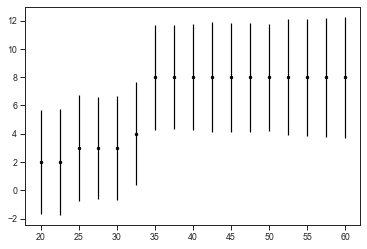

In [42]:
T=np.arange(20, 62.5, 2.5)
num_sample = 1000
nt_distances = simulate_nupack_curve_distance('CAAACCGAAAGGCTTG', num_sample=num_sample, sodium=1)
plt.errorbar(T, np.median(nt_distances, axis=1), yerr=np.std(nt_distances, axis=1), fmt='k.')

(0.0, 16.0)

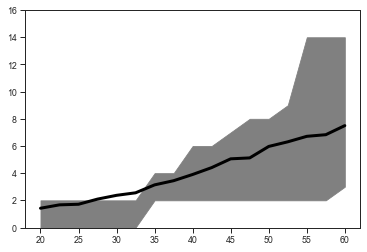

In [99]:
seq = 'CAAACCGAAAGGCTTG'
ub = np.percentile(nt_distances, 75, axis=1)
lb = np.percentile(nt_distances, 25, axis=1)
plt.plot(T, np.mean(nt_distances, axis=1), 'k', linewidth=3)
plt.fill_between(T, ub, lb, color='gray')
plt.ylim([0, len(seq)])

In [57]:
df = pd.DataFrame(nt_distances.T, columns=T)

In [61]:
df.melt()

,variable,value
0,20.0,0
1,20.0,2
2,20.0,0
3,20.0,2
4,20.0,0
...,...,...
16995,60.0,9
16996,60.0,2
16997,60.0,16
16998,60.0,16


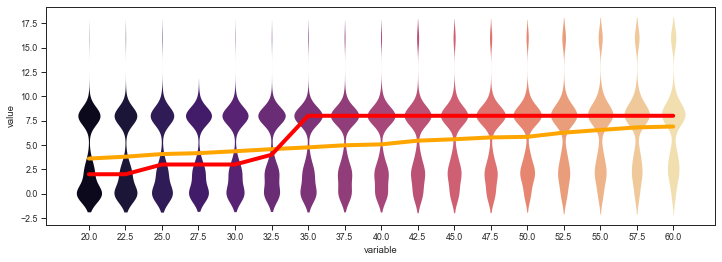

In [86]:
fig, ax = plt.subplots(figsize=(12,4))
sns.violinplot(data=df.melt(), x='variable', y='value', palette='magma', 
               inner=None, linewidth=0)
plt.plot(np.mean(nt_distances, axis=1), 'orange', linewidth=4, zorder=10)
plt.plot(np.median(nt_distances, axis=1), 'red', linewidth=4, zorder=10)


In [102]:
df

,T,distance_nt
0,20.0,0
1,20.0,0
2,20.0,0
3,20.0,0
4,20.0,2
...,...,...
28995,90.0,4
28996,90.0,4
28997,90.0,3
28998,90.0,14


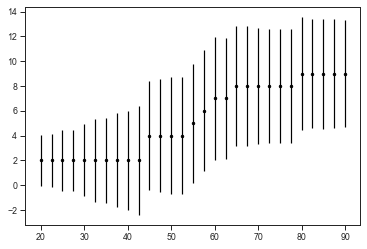

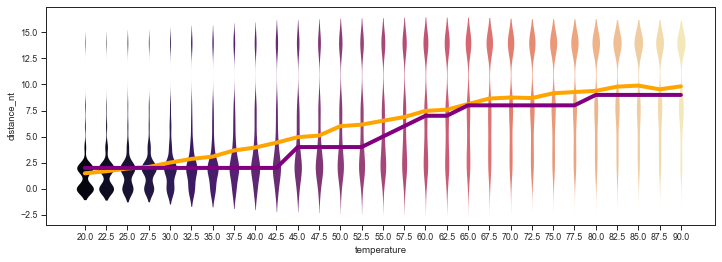

In [104]:
T=np.arange(20, 92.5, 2.5)
num_sample = 1000
seq = 'AAATAGAAATATTT'
nt_distances = simulate_nupack_curve_distance(seq, num_sample=num_sample, T=T, sodium=.15)
df = pd.DataFrame(nt_distances.T, columns=T).melt()
df.columns = ['temperature', 'distance_nt']
plt.errorbar(T, np.median(nt_distances, axis=1), yerr=np.std(nt_distances, axis=1), fmt='k.')
fig, ax = plt.subplots(figsize=(12,4))
sns.violinplot(data=df, x='temperature', y='distance_nt', palette='magma', 
               inner=None, linewidth=0)
plt.plot(np.mean(nt_distances, axis=1), 'orange', linewidth=4, zorder=10)
plt.plot(np.median(nt_distances, axis=1), 'purple', linewidth=4, zorder=10)

In [ ]:
GCCCGCGGAAACGCGGGC

In [118]:
annotation = pd.read_table('./data/annotation/NNNlib2b_annotation_20220329.tsv')


In [119]:
annotation

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_ensemble_NUPACK,TargetStruct,dG_37_NUPACK,pair_prob,dG_37_NUPACK_150mM,dG_37_NUPACK_75mM,dG_37_ensemble,dG_37_ensemble_75mM,dG_37_ensemble_150mM
0,TRINN0,TRIloop,NN,GCGC,NaN,GCGAAAATCGC,-26.4,-0.078156,64.637129,-2.645853,((((...)))),-2.16,0.999934,-2.043401,-1.809079,NaN,NaN,NaN
1,TRINN1,TRIloop,NN,GCGC,NaN,GCGAAATTCGC,-26.4,-0.078156,64.637129,-2.645879,((((...)))),-2.16,0.999934,-2.043401,-1.809079,NaN,NaN,NaN
2,TRINN2,TRIloop,NN,GCGC,NaN,GCGAAACTCGC,-26.4,-0.078156,64.637129,-2.646456,((((...)))),-2.16,0.999925,-2.045171,-1.811351,NaN,NaN,NaN
3,TRINN3,TRIloop,NN,GCGC,NaN,GCGAAAGTCGC,-26.4,-0.078156,64.637129,-2.650905,((((...)))),-2.16,0.999518,-2.062385,-1.833377,NaN,NaN,NaN
4,TRINN4,TRIloop,NN,GCGC,NaN,GCGAATATCGC,-26.4,-0.078156,64.637129,-2.645866,((((...)))),-2.16,0.999934,-2.043401,-1.809079,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42172,pseudoknot_pt_muts7401,External,pseudoknot_pt_muts,NaN,NaN,GCTGACCAGCTATGAGGTCATACATCGTCATAGCGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.412029,-4.211231,-4.774591
42173,pseudoknot_pt_muts7411,External,pseudoknot_pt_muts,NaN,NaN,GCTGACCAGCTATGAGGTCATACATCGTCATAGCTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.444189,-4.975640,-5.620292
42174,pseudoknot_pt_muts7421,External,pseudoknot_pt_muts,NaN,NaN,GCTGACCAGCTATGAGGTCATACATCGTCATAGCAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.717481,-4.486213,-5.065989
42175,pseudoknot_pt_muts7431,External,pseudoknot_pt_muts,NaN,NaN,GCTGACCAGCTATGAGGTCATACATCGTCATAGCAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.770006,-4.515784,-5.100783


In [120]:
annotation.rename(columns={'dG_37_ensemble_NUPACK': 'dG_37_NUPACK_ensemble'}, inplace=True)

Series
MisMatches       18240
Bulges           11520
Hairpin Loops     7680
WatsonCrick       3072
VARloop            172
dtype: int64
Series MisMatches,  18240 variants
Series Bulges,  11520 variants
Series Hairpin Loops,  7680 variants
Series WatsonCrick,  3072 variants


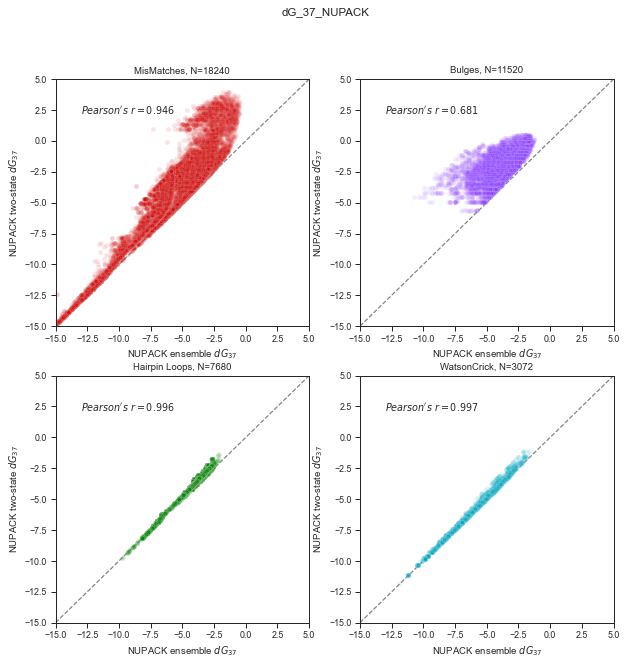

In [126]:
from nnn import plotting
plotting.plot_comparison_by_series(annotation, 'dG_37_NUPACK', '_ensemble', 
                                   lim=[-15,5], xlabel='NUPACK ensemble $dG_{37}$', ylabel='NUPACK two-state $dG_{37}$')
util.save_fig('./fig/NUPACK/NUPACK_ensemble_vs_2state_by_series.pdf')

## Compare columns of the 2 latest versions

In [2]:
anno28 = pd.read_table('./data/annotation/nnnlib2b_annotation_20220328.tsv')
anno29 = pd.read_table('./data/annotation/NNNlib2b_annotation_20220329.tsv')

In [6]:
set(anno29.columns) - set(anno28.columns)

{'dG_37_ensemble', 'dG_37_ensemble_150mM', 'dG_37_ensemble_75mM'}

In [7]:
anno28.columns

Index(['SEQID', 'Series', 'ConstructType', 'bottomScaffold', 'topScaffold',
       'RefSeq', 'dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK',
       'dG_37_ensemble_NUPACK', 'TargetStruct', 'dG_37_NUPACK', 'pair_prob',
       'dG_37_NUPACK_150mM', 'dG_37_NUPACK_75mM'],
      dtype='object')

In [9]:
anno28

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_ensemble_NUPACK,TargetStruct,dG_37_NUPACK,pair_prob,dG_37_NUPACK_150mM,dG_37_NUPACK_75mM
0,TRINN0,TRIloop,NN,GCGC,NaN,GCGAAAATCGC,-26.4,-0.078156,64.637129,-2.645853,((((...)))),-2.16,0.999934,-2.043401,-1.809079
1,TRINN1,TRIloop,NN,GCGC,NaN,GCGAAATTCGC,-26.4,-0.078156,64.637129,-2.645879,((((...)))),-2.16,0.999934,-2.043401,-1.809079
2,TRINN2,TRIloop,NN,GCGC,NaN,GCGAAACTCGC,-26.4,-0.078156,64.637129,-2.646456,((((...)))),-2.16,0.999925,-2.045171,-1.811351
3,TRINN3,TRIloop,NN,GCGC,NaN,GCGAAAGTCGC,-26.4,-0.078156,64.637129,-2.650905,((((...)))),-2.16,0.999518,-2.062385,-1.833377
4,TRINN4,TRIloop,NN,GCGC,NaN,GCGAATATCGC,-26.4,-0.078156,64.637129,-2.645866,((((...)))),-2.16,0.999934,-2.043401,-1.809079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41331,MMTM7099,MisMatches,3mer,GATATC,CGATCGATCG,GATGGGCGATCGAAAGATCGGCGATC,-71.7,-0.204353,77.713916,-8.910037,(((.(.(((((....))))).).))),-8.32,0.986053,-7.225804,-6.636636
41332,MMTM7100,MisMatches,3mer,GATATC,CGATCGATCG,GATGGACGATCGAAAGATCGTGGATC,-68.2,-0.200645,66.754066,-7.424770,(((..((((((....))))))..))),-5.97,0.869442,-6.084462,-5.610973
41333,MMTM7101,MisMatches,3mer,GATATC,CGATCGATCG,GATGGTCGATCGAAAGATCGAGGATC,-68.0,-0.200451,66.084357,-6.907534,(((..((((((....))))))..))),-5.83,0.940963,-5.554133,-5.093054
41334,MMTM7102,MisMatches,3mer,GATATC,CGATCGATCG,GATGGCCGATCGAAAGATCGGGGATC,-69.8,-0.203224,70.312954,-7.955172,(((..((((((....))))))..))),-6.77,0.788227,-6.548455,-6.054309


In [8]:
anno29

,SEQID,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_ensemble_NUPACK,TargetStruct,dG_37_NUPACK,pair_prob,dG_37_NUPACK_150mM,dG_37_NUPACK_75mM,dG_37_ensemble,dG_37_ensemble_75mM,dG_37_ensemble_150mM
0,TRINN0,TRIloop,NN,GCGC,NaN,GCGAAAATCGC,-26.4,-0.078156,64.637129,-2.645853,((((...)))),-2.16,0.999934,-2.043401,-1.809079,NaN,NaN,NaN
1,TRINN1,TRIloop,NN,GCGC,NaN,GCGAAATTCGC,-26.4,-0.078156,64.637129,-2.645879,((((...)))),-2.16,0.999934,-2.043401,-1.809079,NaN,NaN,NaN
2,TRINN2,TRIloop,NN,GCGC,NaN,GCGAAACTCGC,-26.4,-0.078156,64.637129,-2.646456,((((...)))),-2.16,0.999925,-2.045171,-1.811351,NaN,NaN,NaN
3,TRINN3,TRIloop,NN,GCGC,NaN,GCGAAAGTCGC,-26.4,-0.078156,64.637129,-2.650905,((((...)))),-2.16,0.999518,-2.062385,-1.833377,NaN,NaN,NaN
4,TRINN4,TRIloop,NN,GCGC,NaN,GCGAATATCGC,-26.4,-0.078156,64.637129,-2.645866,((((...)))),-2.16,0.999934,-2.043401,-1.809079,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42172,pseudoknot_pt_muts7401,External,pseudoknot_pt_muts,NaN,NaN,GCTGACCAGCTATGAGGTCATACATCGTCATAGCGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.412029,-4.211231,-4.774591
42173,pseudoknot_pt_muts7411,External,pseudoknot_pt_muts,NaN,NaN,GCTGACCAGCTATGAGGTCATACATCGTCATAGCTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.444189,-4.975640,-5.620292
42174,pseudoknot_pt_muts7421,External,pseudoknot_pt_muts,NaN,NaN,GCTGACCAGCTATGAGGTCATACATCGTCATAGCAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.717481,-4.486213,-5.065989
42175,pseudoknot_pt_muts7431,External,pseudoknot_pt_muts,NaN,NaN,GCTGACCAGCTATGAGGTCATACATCGTCATAGCAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.770006,-4.515784,-5.100783
